In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('/content/combined_data.csv',encoding='ISO-8859-1')

In [6]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


<Axes: >

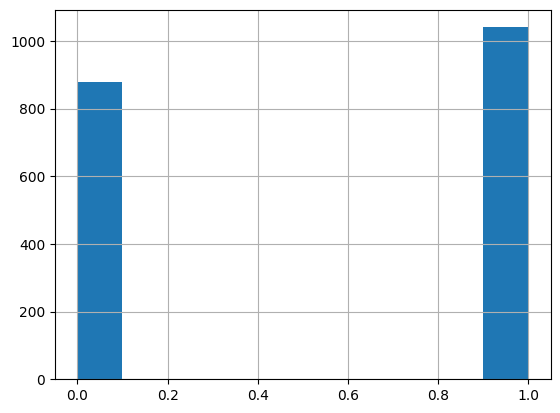

In [7]:
df['label'].hist()

In [10]:
df_train, df_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [12]:
df_train.shape, df_test.shape, y_train.shape, y_test.shape

((1534,), (384,), (1534,), (384,))

In [14]:
featurizer = CountVectorizer(decode_error='ignore')
X_train = featurizer.fit_transform(df_train)
X_test = featurizer.transform(df_test)

In [15]:
X_train

<1534x31305 sparse matrix of type '<class 'numpy.int64'>'
	with 183497 stored elements in Compressed Sparse Row format>

In [16]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [17]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

In [18]:
Ptrain = model.predict(X_train)
Ptest = model.predict(X_test)

In [19]:
train_f1 = f1_score(y_train, Ptrain)
test_f1 = f1_score(y_test, Ptest)

In [20]:
Prob_train = model.predict_proba(x_train)[:, 1]
Prob_test = model.predict_proba(x_test)[:, 1]

In [21]:
train_auc = roc_auc_score(y_train, Prob_train)
test_auc = roc_auc_score(y_test, Prob_test)

In [22]:
metrics_df = pd.DataFrame({
    'Train/Test': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'F1': [train_f1, test_f1],
    'AUC': [train_auc, test_auc]
})

In [23]:
print(metrics_df)

  Train/Test  Accuracy        F1       AUC
0      Train  0.992177  0.992727  0.999610
1       Test  0.914062  0.916456  0.985355


In [32]:
fpr_train, tpr_train, _ = roc_curve(y_train, Prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, Prob_test)

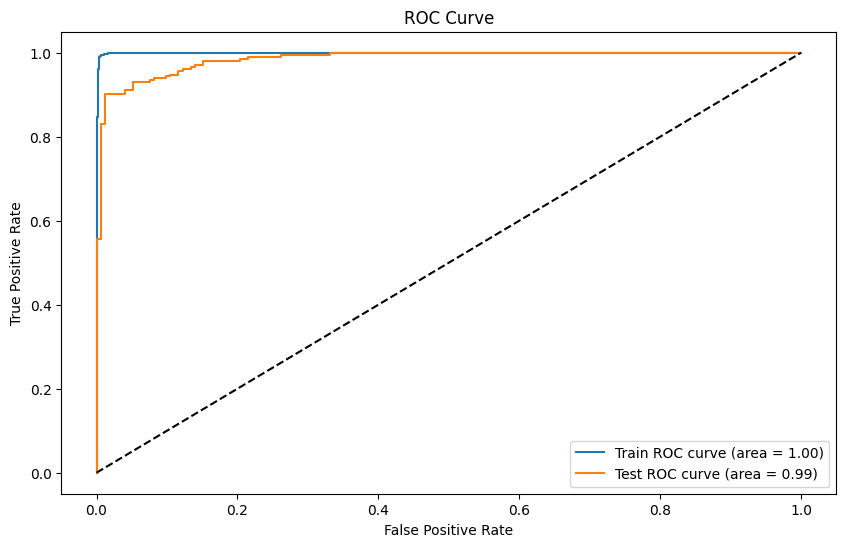

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(train_auc))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

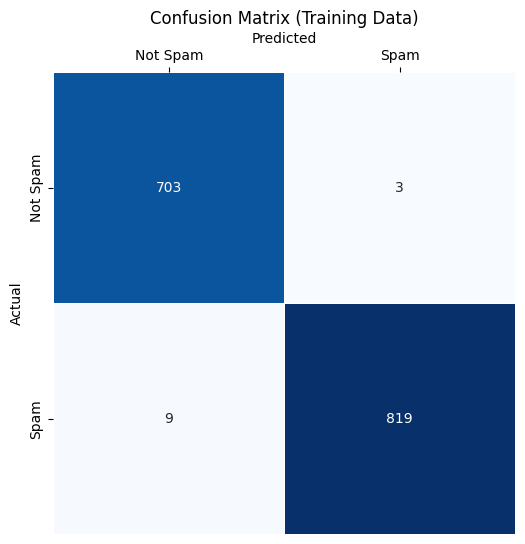

In [34]:
cm = confusion_matrix(y_train, Ptrain)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Training Data)')
plt.gca().xaxis.tick_top()  # Put x-axis labels on top
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.show()

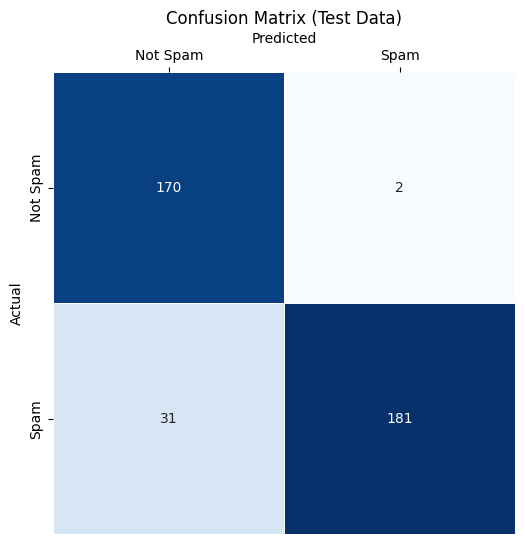

In [35]:
cm_test = confusion_matrix(y_test, Ptest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Test Data)')
plt.gca().xaxis.tick_top()  # Put x-axis labels on top
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.show()

In [40]:
def visualize(label):
    words = ''
    for msg in df[df['label'] == label]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

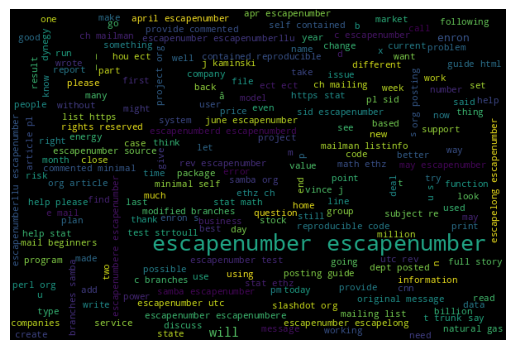

In [44]:
visualize(0)

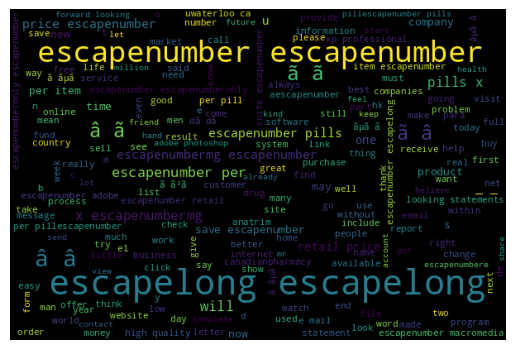

In [45]:
visualize(1)

In [46]:
x = featurizer.transform(df['text'])
df['predictions'] = model.predict(x)

In [50]:
id_spam = df[(df['predictions'] == 0) & (df['label'] == 1)]['text']
for msg in id_spam:
    print(msg)

 oxford university press escapenumber escapenumber overwriting a file of the same name is not allowed pag page list compound file here end users work on machines escapenumber that connect for example over a modem and telephone lines to a point of presence machine escapenumber that is on the enterprise's network oxford university press escapenumber escapenumber gets the type of the remote object to activate use this directive to specify a template for requests you want to accept and send to another server oxygen fresh pure green cold oxygen turning the valley into a river delta the hand was dry and firm occasionally due to editing errors or other factors it may be necessary to cause a serial number to become smaller oxford university press escapenumber escapenumber solid volumes must be extracted starting from first in sequence pae permits an xescapenumber sytem to have up to escapenumbergb of physical memory but an operating system must be specially coded to use memory beyond escapenum

In [52]:
not_spam = df[(df['predictions'] == 1) & (df['label'] == 0)]['text']
for msg in not_spam:
    print(msg)

here ' s the fortune link . . .

here you go ladies :
i will forward any updates as they become available .
thanks ,
brenda
you are invited to participate in techsay com's it research panel dear zombie when you registered with brainbench you also expressed interest in learning more about one of our membership benefits whereby you get paid cash in return for completing on line surveys that shape the future of technology our partner in this venture is techsay com a global technology research firm this risk free no obligation opportunity allows you to join the thousands of other brainbench it professionals who are making money while influencing the future of technology the process is simple escapenumber you will be taking online surveys directly related to your profession and providing feedback that drives the direction of it research and product development receive emailed survey invitations from surveys techsay com escapenumber for each survey you complete you will be awarded a minimum 